# Boom Rental Bike 

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data import and check

In [2]:
#reading csv dataset
rental=pd.read_csv("C:\\Users\\hp\\Desktop\\Upgrad\\Linear_Regression\\Bike\\day.csv")

rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
rental.shape

(730, 16)

In [5]:
rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There looks to be no redundant/duplicate or empty data hence we can use existing dataset without removing anything

### Data cleaning

We need to convert columns like season,month,weathersit,weekday feature value into categorical string values before proceeding with model building

In [6]:
#Converting season
rental.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
rental.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [7]:
#Converting mnth
rental.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
rental.mnth.value_counts(normalize=True)

Oct    0.084932
Aug    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Jan    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [8]:
#Converting weathersit
rental.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
rental.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [9]:
#Converting weekdays
rental.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
rental.weekday.value_counts(normalize=True)

Tuesday      0.143836
Monday       0.143836
Wednesday    0.142466
Sunday       0.142466
Friday       0.142466
Thursday     0.142466
Saturday     0.142466
Name: weekday, dtype: float64

#### Removing unwanted columns

<function matplotlib.pyplot.show(close=None, block=None)>

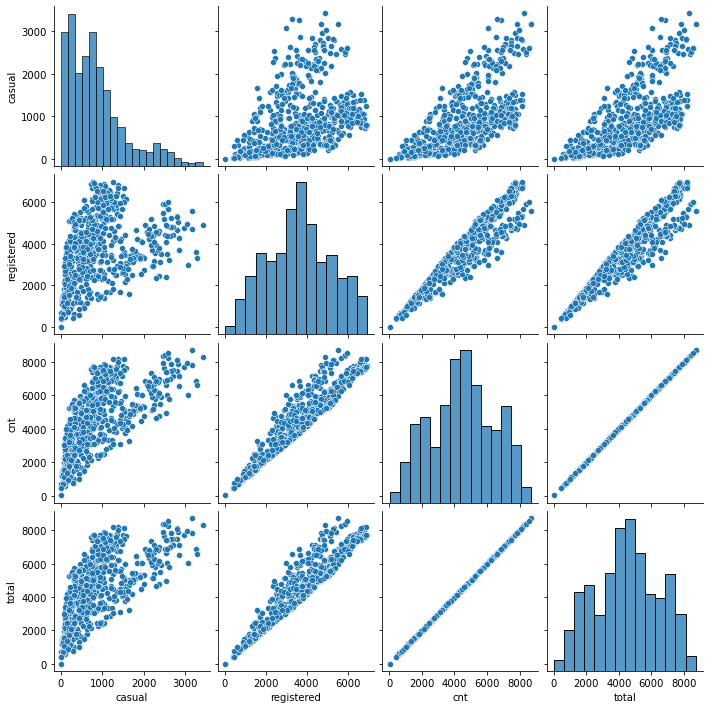

In [10]:
# Checking the relationship between casual, registered and cnt column
rental_cnt = rental[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
rental_cnt['total'] = rental_cnt['casual'] + rental_cnt ['registered']
sns.pairplot(rental_cnt)
plt.show

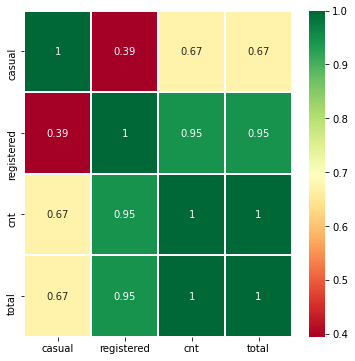

In [11]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(rental_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

##### Observations:

Based on the high level analysis of the data and the data dictionary, the following variables can be removed from further analysis -

- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we can remove these column
- casual & registered: Both these columns contains the count of bike booked by different categories of customers. From the - pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [12]:
#dropping the unwanted columns
rental.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
rental.shape

(730, 12)

## Categorical Variable Analysis 

We will be building box plot of all the categorical variable against 'cnt' target variable to see how each of the predictor variable stackup against the target variable.

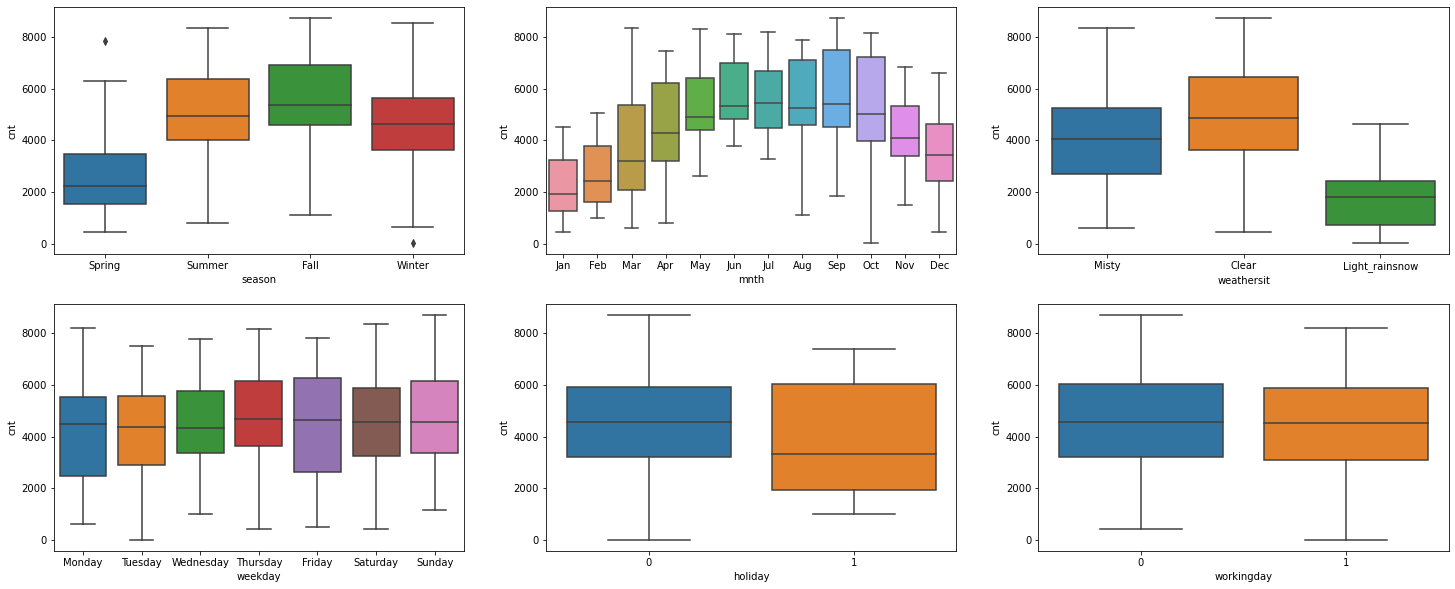

In [13]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental)
plt.show()

In [14]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = rental.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/rental.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/rental.cnt.count()*100
    return round(cat_df,2)

In [15]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=rental)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=rental, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

#### Seasons 

In [16]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


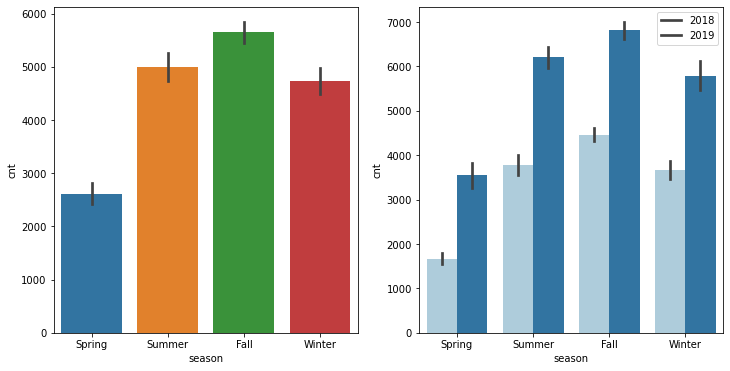

In [17]:
categorical_plot('season',12,6)

##### Observation:

Almost 32% of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable.

#### Months

In [18]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


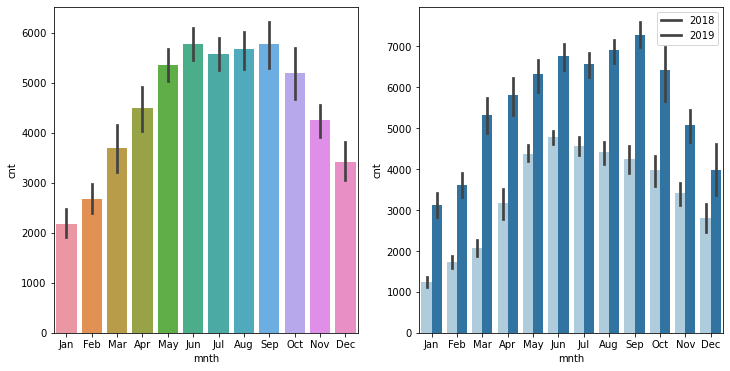

In [19]:
categorical_plot('mnth',12,6)

##### Observation:

Almost 10% of the bike booking was happening in the months May to September with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

#### Weather 

In [20]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


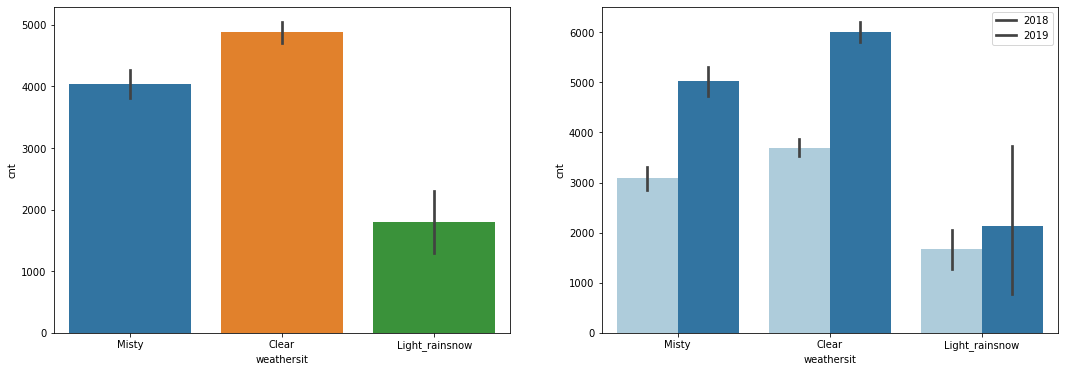

In [21]:
categorical_plot('weathersit',18,6)

##### Observation:

Almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is Heavy_RainSnow

#### Weekday 

In [22]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


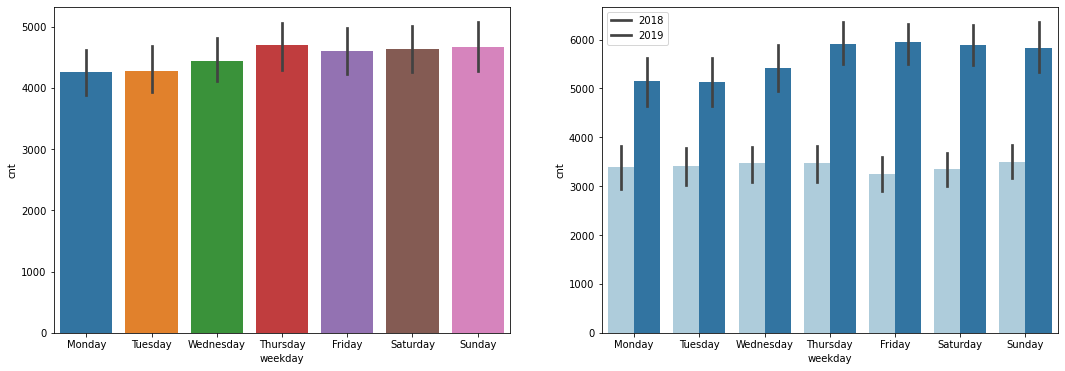

In [23]:
categorical_plot('weekday',18,6)

##### Observations:

Weekday variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection.

#### Holiday 

In [24]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


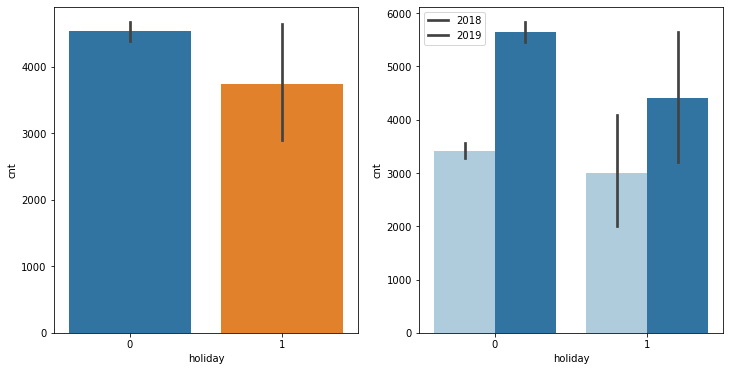

In [25]:
categorical_plot('holiday',12,6)

##### Observation:

Almost 97% of bike rentals are happening during non-holiday time.

#### Working Day

In [26]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


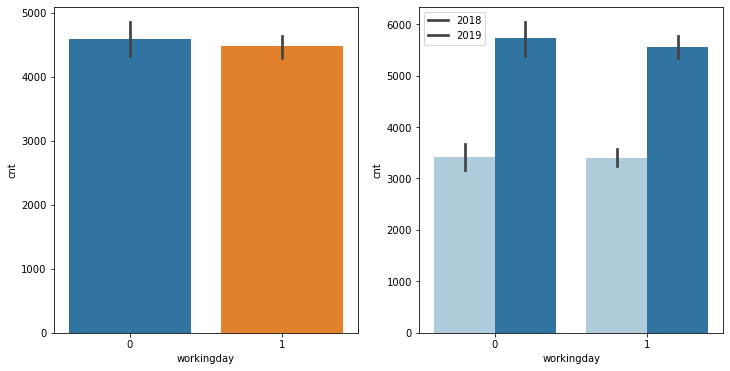

In [27]:
categorical_plot('workingday',12,6)

##### Observation:

Almost 69% of the bike booking were happening in 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable

#### Year

In [28]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


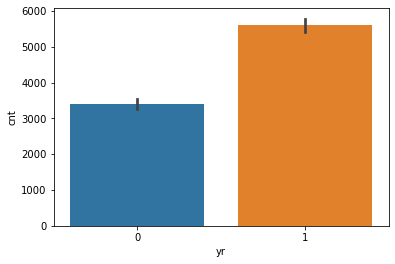

In [29]:
sns.barplot('yr','cnt',data=rental)
plt.show()

##### Observation:
    
Bike rental demand has gone up from 2018 to 2019

##### Observations of Categorical Variable Analysis:

- People tend to take rental bikes mostly during clear weather and avoid mostly when there is lightning/rainstrom
- Falls are preferred for rental bikes.
- Demand for rental bikes are higher during May to September.
- Weekdays don't much help in anlaysis we still need to analyze more to understand if it can be a good predictor or not.
- Holidays surely impact the rental bike count , there should be no holiday.
- It should be working day, which helps in increasing rental count.
- 2019 was much better than 2018 for rental bike count.

## Numerical Variable Analysis

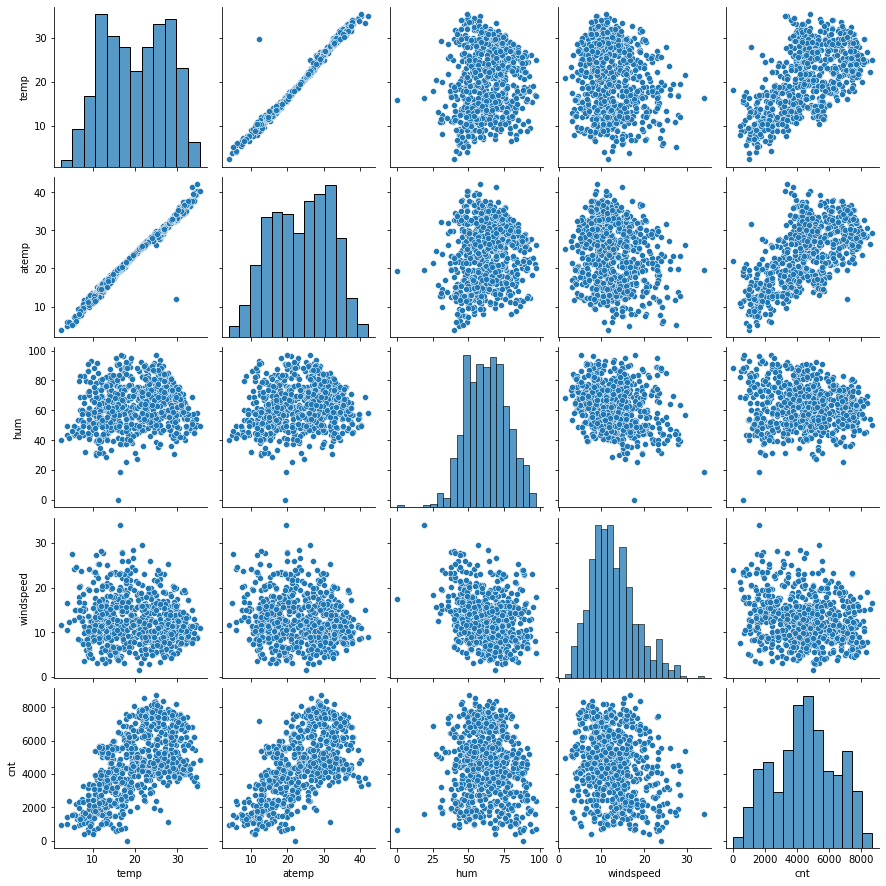

In [30]:
#Generating pairplot to check the relationships between numeric variables
rental_num = rental[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(rental_num)
plt.show()

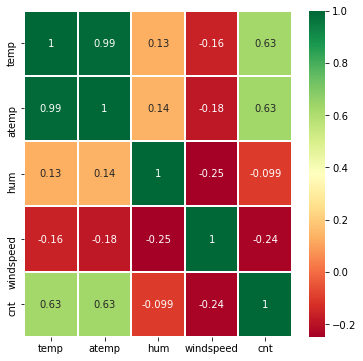

In [31]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(rental_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

##### Observation:

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

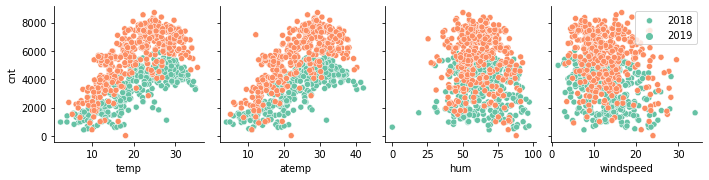

In [32]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=rental, hue='yr', palette='Set2', diag_kind=None)
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

##### Observation:
    
All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key parameter in the model.

## Data Preparation

#### Dummy Variable Creation

##### Season

In [33]:
season = pd.get_dummies(rental['season'], drop_first = True)
season.head(5)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Weather

In [34]:
weather = pd.get_dummies(rental['weathersit'], drop_first = True)
weather.head(5)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### Month

In [35]:
month = pd.get_dummies(rental['mnth'], drop_first = True)
month.head(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [36]:
weekday = pd.get_dummies(rental['weekday'], drop_first = True)
weekday.head(5)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### Merging the Dataframes 

In [37]:
# Creating a new dataframe called rental_new where season, month, weather and weekday dataframe is being added
rental_new = pd.concat([rental,season,month,weather,weekday], axis = 1)
rental_new.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [38]:
rental_new.shape

(730, 34)

In [39]:
rental_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Spring          730 non-null    uint8  
 13  Summer          730 non-null    uint8  
 14  Winter          730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [40]:
rental_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.028767,0.336986,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.167266,0.473004,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Removing unnecessary columns

In [41]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
rental_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
rental_new.shape

(730, 30)

In [42]:
rental_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Spring          730 non-null    uint8  
 9   Summer          730 non-null    uint8  
 10  Winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

##### Observation:
    
All the 30 columns have numeric value. The dataframe is ready now for splitting into Train & Test dataframes

## Splitting the data into Train & Test Dataset 

### Train & Test Split

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
rental_train, rental_test = train_test_split(rental_new, train_size = 0.7, random_state = 333)

In [44]:
rental_train.shape

(510, 30)

In [45]:
rental_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,20.218078,23.590696,62.340743,12.771365,4494.103922,0.250980,0.245098,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,7.500110,8.138271,14.418728,5.205888,1948.315655,0.434003,0.430568,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717924,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327087,72.958300,15.624869,5962.750000,0.750000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
rental_test.shape

(220, 30)

In [47]:
rental_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,20.553817,24.040727,63.749086,12.745665,4540.236364,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,7.533926,8.188064,13.790510,5.184271,1911.199159,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Rescalling bike_train dataframe

In [48]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [49]:
#Dataframe before scaling 
rental_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,1,0,0,0,0,0


In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
rental_train[num_vars] = scaler.fit_transform(rental_train[num_vars])

In [51]:
#Checking after rescalling
rental_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,1,0,0,0,0,0


#### Checking Correlation Coefficient

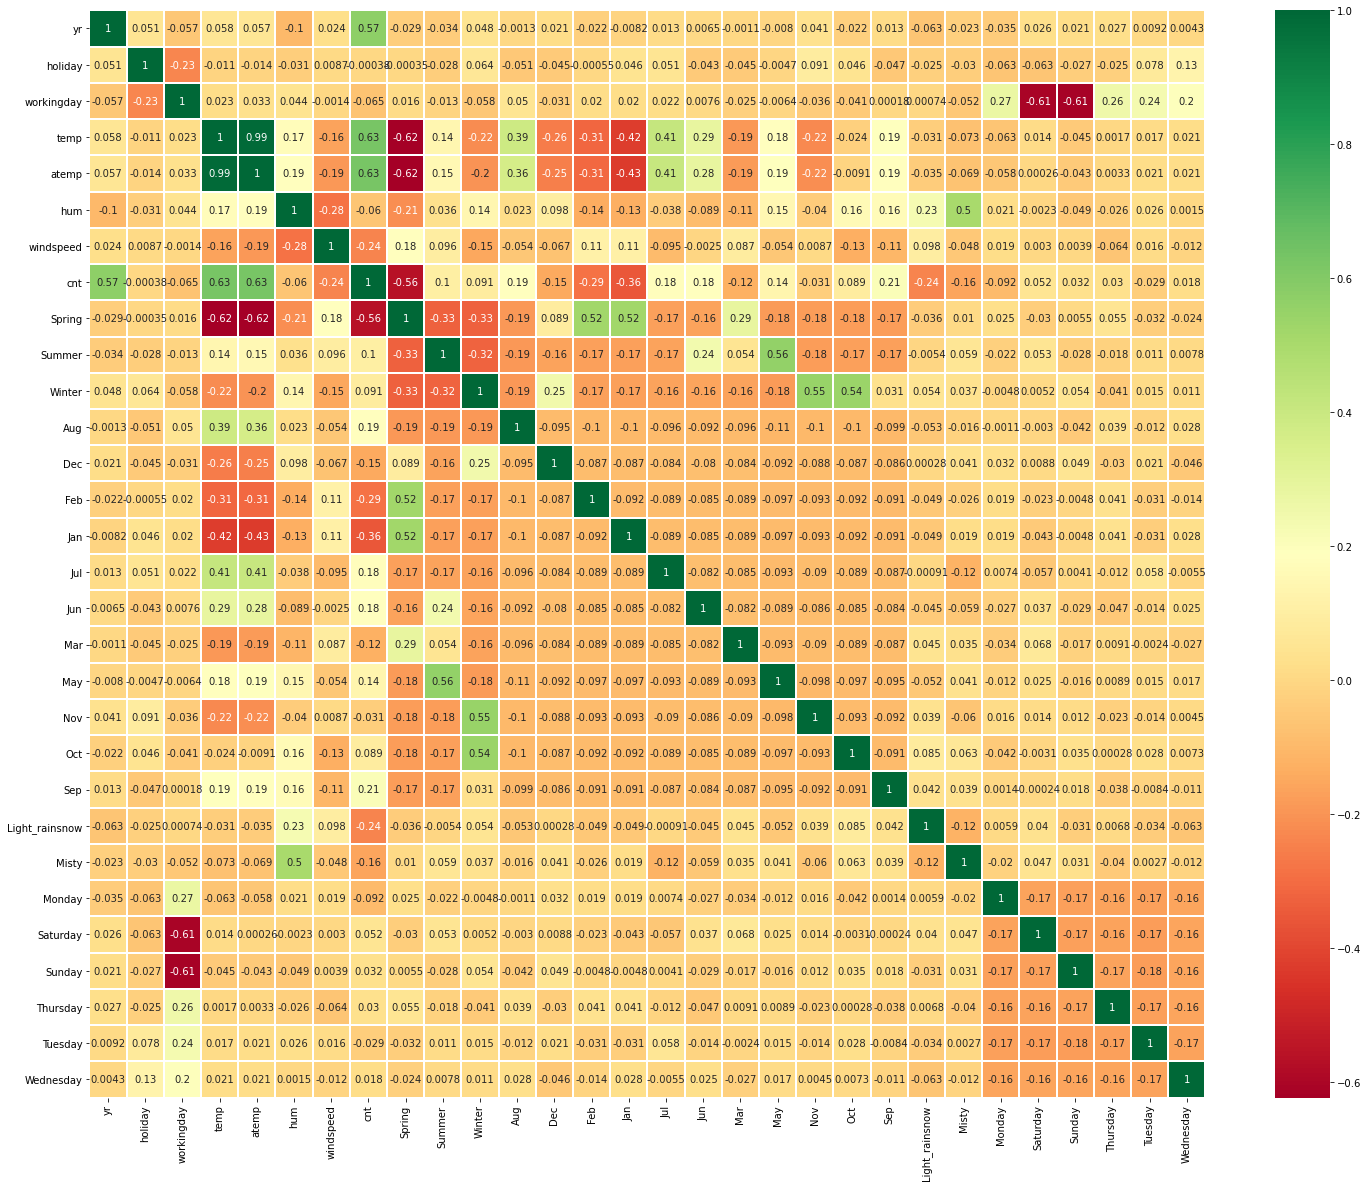

In [52]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(rental_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

##### Observation:

- There is multi-collinearity between the variables. We need to consider the factors when developing the model.
- temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
- workingday variable has high negative correlation with Sat & Sun (where workingday =0)
- Spring is negatively correlated with cnt
- temp, atemp and yr has strong correlation with cnt
- misty weather and humidity has correlation
- various months and corresponding weather has correlation

## Building the Linear Model 

### Dividing into X_train and y_train

In [53]:
y_train = rental_train.pop('cnt')
X_train = rental_train

### RFE

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 13),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [56]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jul', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [57]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Manual Model Development using statsmodel

In [59]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Model 1

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,357.78
2,atemp,354.14
3,hum,22.92
4,windspeed,5.12
6,Winter,2.76
5,Spring,2.69
13,Misty,2.28
0,yr,2.05
10,Nov,1.83
8,Jul,1.42


In [61]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.15e-183
Time:                        12:09:16   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

##### Obseration:

Both temp and atemp has high VIF but atemp has high p-value additionally. We will go ahead with dropping atemp from the equation

#### Model 2

In [62]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,22.50
1,temp,15.96
3,windspeed,5.01
5,Winter,2.73
4,Spring,2.69
12,Misty,2.27
0,yr,2.05
9,Nov,1.83
7,Jul,1.42
6,Dec,1.41


In [63]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.15e-183
Time:                        12:09:16   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

##### Observation:

As hum has the highest VIF value, we will remove the variable next

#### Model 3

In [64]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.21
2,windspeed,4.97
4,Winter,2.35
0,yr,2.05
3,Spring,1.90
8,Nov,1.80
11,Misty,1.54
6,Jul,1.38
5,Dec,1.34
7,Mar,1.22


In [65]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.05e-181
Time:                        12:09:16   Log-Likelihood:                 491.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     496   BIC:                            -896.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2710      0.026     10.

##### Observation:

Next we will remove Nov due to high p-value

#### Model 4

In [66]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.11
2,windspeed,4.84
0,yr,2.04
3,Spring,1.90
4,Winter,1.53
10,Misty,1.53
6,Jul,1.38
5,Dec,1.22
7,Mar,1.22
8,Sep,1.20


In [67]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.47e-180
Time:                        12:09:16   Log-Likelihood:                 486.90
No. Observations:                 510   AIC:                            -947.8
Df Residuals:                     497   BIC:                            -892.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2559      0.025     10.

##### Observation:
    
Next we will remove Mar due to high p-value

#### Model 5

In [68]:
X_train_new = X_train_new.drop(['Mar'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.11
2,windspeed,4.84
0,yr,2.04
3,Spring,1.78
9,Misty,1.53
4,Winter,1.52
6,Jul,1.37
5,Dec,1.21
7,Sep,1.19
10,Saturday,1.18


In [69]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.14e-179
Time:                        12:09:16   Log-Likelihood:                 481.36
No. Observations:                 510   AIC:                            -938.7
Df Residuals:                     498   BIC:                            -887.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2622      0.026     10.

##### Observation:

Dec has to be removed as p-value looks to be higher

#### Model 6

In [70]:
X_train_new = X_train_new.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.11
2,windspeed,4.83
0,yr,2.04
3,Spring,1.73
8,Misty,1.52
4,Winter,1.38
5,Jul,1.37
6,Sep,1.19
9,Saturday,1.18
7,Light_rainsnow,1.07


In [71]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.86e-179
Time:                        12:09:16   Log-Likelihood:                 478.68
No. Observations:                 510   AIC:                            -935.4
Df Residuals:                     499   BIC:                            -888.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2545      0.025      9.

##### Observation:
    
July column can be dropped as it is showing littke p-value after Saturday which looks to be an important column for analysis, so we cannot drop Saturday hence we will be try dropping Jul

#### Model 7

In [72]:
X_train_new = X_train_new.drop(['Jul'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.73
1,temp,4.13
0,yr,2.04
3,Spring,1.73
7,Misty,1.50
4,Winter,1.35
8,Saturday,1.17
5,Sep,1.15
6,Light_rainsnow,1.07


In [73]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.97e-179
Time:                        12:09:16   Log-Likelihood:                 474.63
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -886.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2642      0.025     10.

##### Observation:
    
This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

In [74]:
lr7.params

const             0.264199
yr                0.231845
temp              0.417791
windspeed        -0.146194
Spring           -0.117340
Winter            0.044982
Sep               0.069878
Light_rainsnow   -0.309695
Misty            -0.070782
Saturday          0.026058
dtype: float64

##### Observation:

So the final equation for line becomes:

cnt = 0.264199 + ( 0.231845 * yr) + ( 0.417791 * temp) - ( 0.146194 * windspeed ) - ( 0.117340 * Spring ) + ( 0.044982 * Winter ) + ( 0.069878 * Sep ) - ( 0.309695 * Light_rainsnow ) - ( 0.070782 * Misty ) + ( 0.026058 * Saturday )

### Linear Relationship

Verfication need to be done if we still see linear model post dropping columns for model building.

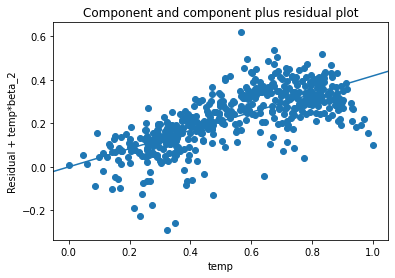

In [75]:
sm.graphics.plot_ccpr(lr7, 'temp')
plt.show()

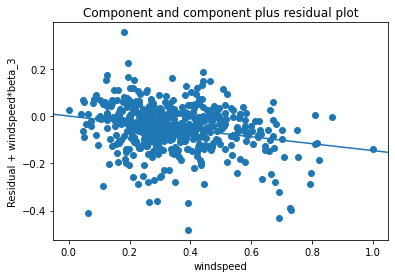

In [76]:
sm.graphics.plot_ccpr(lr7, 'windspeed')
plt.show()

##### Observation: 

The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

#### Homoscedasticity

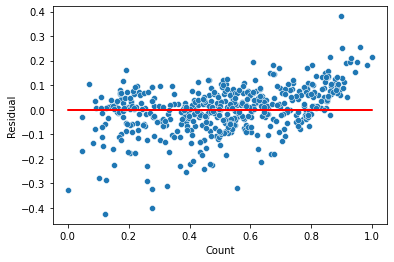

In [77]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### Observation: 

There is no visible pattern in residual values, thus homoscedacity is well preserved

#### Absence of Multicolinearity

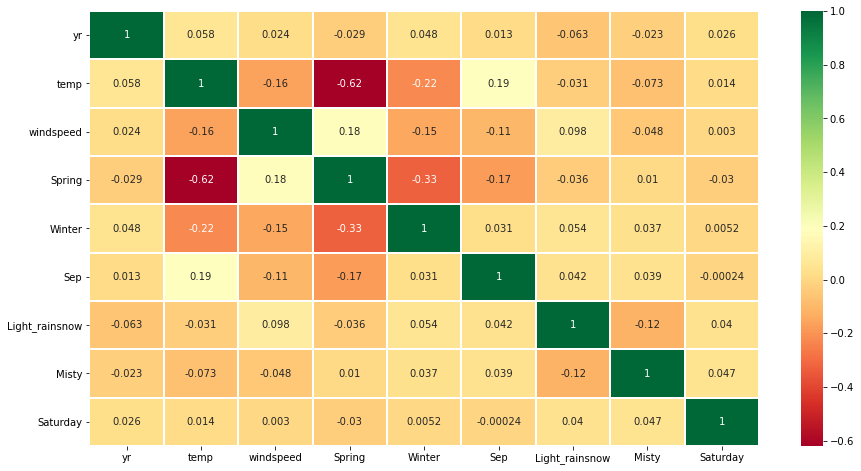

In [78]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [79]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.73
1,temp,4.13
0,yr,2.04
3,Spring,1.73
7,Misty,1.50
4,Winter,1.35
8,Saturday,1.17
5,Sep,1.15
6,Light_rainsnow,1.07


##### Observation:

All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

#### Normality of error

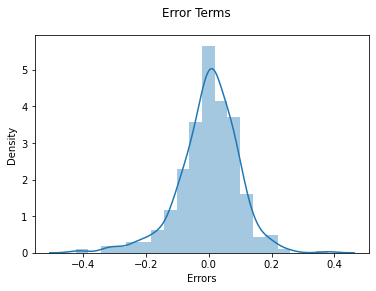

In [80]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

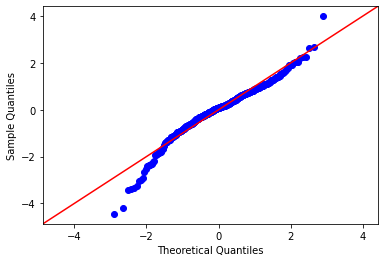

In [81]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

##### Observation:
Based on the histogram, we can conclude that error terms are following a normal distribution

#### Independence of residuals

In [82]:
print('The Durbin-Watson value for Final Model lr 7 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 7 is 1.9829


##### Observation:
There is almost no autocorrelation.

### Making Predictions using final model 

#### Scaling bike_test dataframe

In [83]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
rental_test[num_vars] = scaler.transform(rental_test[num_vars])
rental_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,1,0,0


In [84]:
rental_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing X_test and y_test

In [85]:
y_test = rental_test.pop('cnt')
X_test = rental_test

In [86]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   Spring          220 non-null    uint8  
 5   Winter          220 non-null    uint8  
 6   Sep             220 non-null    uint8  
 7   Light_rainsnow  220 non-null    uint8  
 8   Misty           220 non-null    uint8  
 9   Saturday        220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.9 KB


In [87]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)

### Model Evaluation

Text(0, 0.5, 'y_pred')

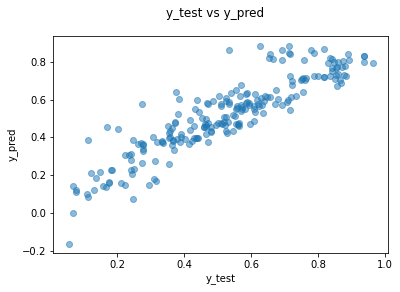

In [88]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

#### R2 Value Calculation for rental_test dataframe

In [89]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8076

#### Adjusted R2 Value Calculation for rental_test dataframe

In [90]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7994

#### Calculating RMSE for the selected Model

In [91]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0962

In [92]:
lr7.params

const             0.264199
yr                0.231845
temp              0.417791
windspeed        -0.146194
Spring           -0.117340
Winter            0.044982
Sep               0.069878
Light_rainsnow   -0.309695
Misty            -0.070782
Saturday          0.026058
dtype: float64

### Model Outcome Summary

As per the final model, the top 3 predictor variables that influences bike booking are:

- Temperature (Temp):
A coefficient value of ‘0.417791’ indicated that a temperature has significant impact on bike rentals
- Light Rain & Snow (weathersit =3):
A coefficient value of ‘-0.309695’ indicated that the light snow and rain deters people from renting out bikes
- Year (yr):
A coefficient value of ‘0.231845’ indicated that a year wise the rental numbers are increasing

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.
As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.

##### Model Train & Test R2 Statsitics Comparison:

##### Measurement	      Train Dataset	    Test Dataset
    R2 Value	       81.80%	     80.76%
    Adjusted R2 Value  81.50%	     79.94%